In [ ]:
https://commodityseasonality.com/energies/
https://www.youtube.com/watch?v=5Uf5jR1w4-k&feature=youtu.be
https://www.codingfinance.com/post/2018-04-03-calc-returns-py/


In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install quandl

In [91]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas_datareader

import pandas_datareader.data as dt_data



You should consider upgrading via the 'C:\Users\BIT00452\WPy-3670\python-3.6.7.amd64\python.exe -m pip install --upgrade pip' command.


ImportError: cannot import name 'StringIO'

In [148]:
import quandl

#df_ym = quandl.get("CHRIS/CME_YM1", authtoken="me2tfXfGyi_L3Zseg7RF", start_date="2006-1-1")
#df_vix = quandl.get("CHRIS/CBOE_VX1", authtoken="me2tfXfGyi_L3Zseg7RF", start_date="2007-1-1")
#df_sp = quandl.get("CHRIS/CME_SP1", authtoken="me2tfXfGyi_L3Zseg7RF", start_date="2010-1-1")
df_cl = quandl.get("CHRIS/CME_CL1", authtoken="me2tfXfGyi_L3Zseg7RF" , start_date="2006-1-1")    # oil
#df_c = quandl.get("CHRIS/CME_C1", authtoken="me2tfXfGyi_L3Zseg7RF", start_date="2006-1-1")    # corn
#df_w = quandl.get("CHRIS/CME_W1", authtoken="me2tfXfGyi_L3Zseg7RF", start_date="2010-1-1")    # wheat


In [5]:
 
#df_cl = quandl.get("CHRIS/CME_CL1", authtoken="me2tfXfGyi_L3Zseg7RF", collapse="monthly")


In [154]:


# Augmented dicker-fuller test
df = df_cl  # wti oil
#df = df_ym  # dow jones
#df = df_c  # corn
#df = df_vix# vix

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week of Year'] = df.index.week

try:
    df.drop(columns=['Previous Day Open Interest', 'Change'], inplace=True)
except:
    pass

#print(df.tail())
#print(df.head())



Saved


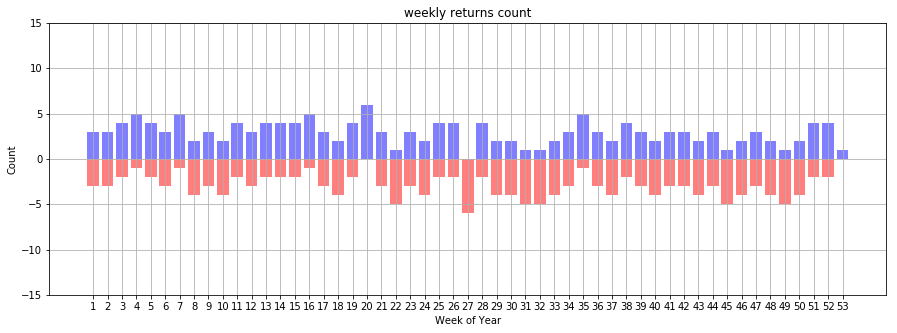

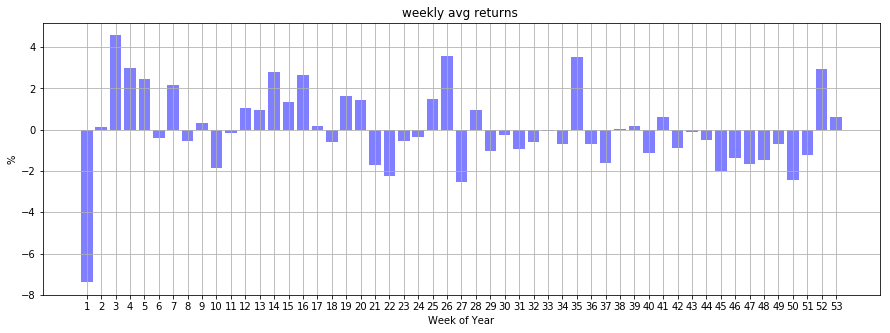

In [170]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline


positive = {}
negative = {}
total = {}

# initialize maps

for i in np.arange(1, 54):
    positive[i] = []
    negative[i] = []
    total[i] = []


# intialise data of lists.
 

years = set()

for key, grp in df.groupby(['Year', 'Week of Year']):
    #print(key)
    if key[0] == 2020:  # skip current year
        continue
    if key[0] < 2014:  # only last 5 years
        continue
        
        
    years.add(key[0])
    
    settle = grp.Settle
    #print(settle.head(10) )
    weekly_ret = settle[-1]/settle[0] -1
         
    if weekly_ret >= 0:
        positive[key[1]].append({'year':key[0], 'ret': weekly_ret})
    else:
        negative[key[1]].append({'year':key[0], 'ret': weekly_ret})
    #print( "%s,%s,%s" % (key[0],key[1], weekly_ret))
    total[key[1]].append({'year':key[0], 'ret': weekly_ret})

#print(positive[1])
#print(negative)
# aggregate for getting count
aggregate_weekly = {}
for key in positive:    
    weekly_returns = positive[key]    
    
    # lazy creation
    if key not in aggregate_weekly:
        aggregate_weekly[key] = {'pos_count':0.0, 'pos_avg': 0.0, 'neg_count':0.0, 'neg_avg': 0.0 }
    
    if len(weekly_returns) ==0:
        continue
        
    pos_avg = 0.0
    for item in weekly_returns:
        pos_avg = pos_avg + item['ret']
    pos_avg = pos_avg/len(weekly_returns)
    aggregate_weekly[key]['pos_count'] = len(weekly_returns)
    aggregate_weekly[key]['pos_avg'] = pos_avg    
    
    

for key in negative:
    weekly_returns = negative[key]

    # lazy creation
    if key not in aggregate_weekly:
        aggregate_weekly[key] = {'pos_count':0.0, 'pos_avg': 0.0, 'neg_count':0.0, 'neg_avg': 0.0 }
    
    if len(weekly_returns) ==0:
        continue


    neg_avg = 0.0
    for item in weekly_returns:
        neg_avg = neg_avg+ item['ret']
    neg_avg = neg_avg/len(weekly_returns)
    
    aggregate_weekly[key]['neg_count'] =  len(weekly_returns)
    aggregate_weekly[key]['neg_avg'] = neg_avg
     
for key in total:
    weekly_returns = total[key]
    
    if len(weekly_returns) ==0:
        continue
    total_avg = 0.0
    for item in weekly_returns:
        total_avg = total_avg+ item['ret']
    total_avg = total_avg/len(weekly_returns)
    aggregate_weekly[key]['total_avg'] = total_avg*100.0
    
    
    
#print(aggregate_weekly)

positive_count_bars = []
negative_count_bars = []
total_returns_avg_bars = []
# save results
f = open('C:\\Dati\\projects\\medium\\weekly_results.csv', 'w', newline='\n', encoding='utf-8')
# http://zetcode.com/python/csv/
with f:
    writer = csv.writer(f)
    
    writer.writerow(['week', 'pos_count', 'pos_avg', 'neg_count', 'neg_avg', 'total_avg'])
    for key in aggregate_weekly:
        
        result = aggregate_weekly[key]
        
        positive_count_bars.append(result['pos_count'])
        negative_count_bars.append(-1.0*result['neg_count'])
        total_returns_avg_bars.append(result['total_avg'])
        try:
            adt = [key, result['pos_count'], result['pos_avg'], -1.0*result['neg_count'], result['neg_avg'], result['total_avg'] ] 
            writer.writerow(adt)
        except:
            pass
print("Saved")



f, (ax1) = plt.subplots(1, 1, figsize=(15, 5))

ax1.bar(np.arange(1, len(positive_count_bars)+1), positive_count_bars, align='center', alpha=0.5, color='b')
ax1.bar(np.arange(1, len(negative_count_bars)+1), negative_count_bars, align='center', alpha=0.5, color='r')
#ax1.axhline(y=5,linewidth=2, color='r')
ax1.set_ylim(-15,15)
ax1.grid(True)

ax1.set(ylabel='count')
ax1.set_title('weekly returns count')
ax1.set(xlabel='Week of Year', ylabel='Count')
plt.setp(ax1, xticks=np.arange(1, len(negative_count_bars)+1) )
plt.show()

f, (ax1) = plt.subplots(1, 1, figsize=(15, 5))

ax1.bar(np.arange(1, len(total_returns_avg_bars)+1), total_returns_avg_bars, align='center', alpha=0.5, color='b')
ax1.grid(True)

ax1.set(xlabel='Week of Year', ylabel='%')
ax1.set_title('weekly avg returns ')
plt.setp(ax1, xticks=np.arange(1, len(total_returns_avg_bars)+1) )
plt.show()


Saved
14  -  15
4  -  4


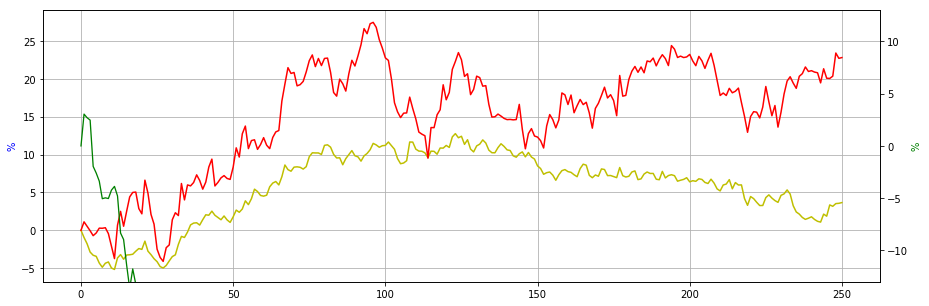

In [172]:
import pandas as pd
import numpy as np
# split dataframe by year
dict_of_years = {k: v for k, v in df.groupby('Year')}

variations = {}

for key, grp in df.groupby(['Year']):
    ret = (grp['Last'] - grp['Last'][0])/grp['Last'][0]
    variations[key] = ret.tolist()

def calculate_return_chart(variations, start_year=None):
    variations_chart = []
    current_year = []
    length = 999
    
    denominator = 0
    if start_year is None:
        denominator = len(variations.keys())
    else:
        for key in variations:
            if key <= start_year:  # only last XXX years            
                continue
            denominator = denominator + 1
    
    
    for key in variations:
        # skip current year
        if key == 2020:
            continue
    
        if start_year is not None and key <= start_year:  # only last XXX years            
            continue
    
        daily_returns = variations[key]
        length = min(length, len(daily_returns))

    
    for i in np.arange(0, length):
        s = 0.0
        c = 0
        for key in variations:
            daily_returns = variations[key]
            
            if key == 2020:
                if i < len(daily_returns):
                    current_year.append(daily_returns[i]*100)
                continue

            if start_year is not None and key < start_year:  # only last XXX years
                continue
                       
            s = s + daily_returns[i]
            c = c +1
            
        variations_chart.append(s*100/( denominator-1 ))
        
    print(c, " - ", denominator)
    return (variations_chart, current_year)

###################################
# dump to file for further analysis
###################################

f = open('C:\\Dati\\projects\\medium\\daily_results.csv', 'w', newline='\n', encoding='utf-8')
# http://zetcode.com/python/csv/
with f:
    writer = csv.writer(f)
    
    writer.writerow(['week', 'pos_count', 'pos_avg', 'neg_count', 'neg_avg', 'total_avg'])
    for key in variations:
        daily_returns = variations[key]
        
        row = [key]
        for ret in daily_returns:
            row.append(ret)
        try:
 
            writer.writerow(row)
        except:
            pass
print("Saved")

###################################

(variations_chart_all, current_year) = calculate_return_chart(variations)
(variations_chart_5y, current_year) = calculate_return_chart(variations, 2016)

fig, ax1 = plt.subplots(figsize=(15, 5) )
ax1.plot(variations_chart_all,'y-')
ax1.plot(variations_chart_5y,'r-')
ax1.grid(True)
#ax1.set_ylim(-13,13)

ax2 = ax1.twinx()

ax2.plot(current_year, 'g-', linewidth=1.3)
ax2.set_ylim(-13,13)

ax2.set_ylabel('%', color='g')
ax1.set_ylabel('%', color='b')


plt.show()




In [193]:
# Hurst Exponent

In [18]:
from hurst import compute_Hc

hursts = []
for period in periods:
    # Evaluate Hurst equation
    if len(df.Settle[-period:]) < 100:
        H = c= 0
    else:
        H, c, data = compute_Hc(df.Settle[-period:], kind='price', simplified=True)

    hursts.append(H)

print(hursts)


[0.5501906972811416, 0.4562363810477026, 0.5687669613625839, 0.6364396657397046]


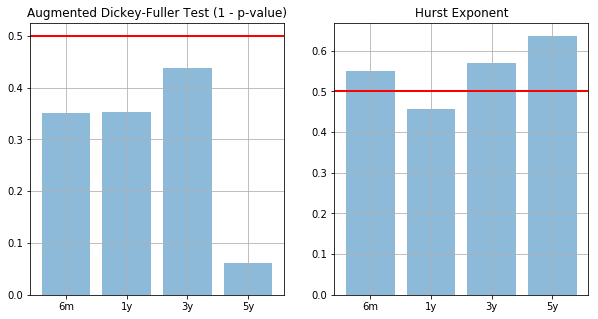

In [19]:
import numpy as np

objects = ( '6m', '1y', '3y', '5y')
y_pos = np.arange(len(objects))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.bar(y_pos, adfs, align='center', alpha=0.5)
ax1.axhline(y=0.50,linewidth=2, color='r')

ax1.grid(True)

ax2.bar(y_pos, hursts, align='center', alpha=0.5)
ax2.axhline(y=0.50,linewidth=2, color='r')

ax2.grid(True)
# Set the ticks and ticklabels for all axes
plt.setp(ax1, xticks=range(len(objects)), xticklabels=objects)
plt.setp(ax2, xticks=range(len(objects)), xticklabels=objects)


ax1.set_title('Augmented Dickey-Fuller Test (1 - p-value)')
ax2.set_title('Hurst Exponent')

plt.show()
